In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Tasks/plan

- Get dataset
- Get input from voice and convert it to text
- parse and fetch input parameters from it
- Train the Neural network
- Get output and convert it into output

In [2]:
df = pd.read_csv("Crop_recommendation.csv")

In [4]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [5]:
df.label.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

# Use speect to text pythton lib and then google transalte api to translate

In [62]:
!pip install SpeechRecognition
!pip install PyAudio
!pip install pyttsx3
!pip install gtts


[notice] A new release of pip available: 22.3 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


^C



[notice] A new release of pip available: 22.3 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
import speech_recognition as sr

In [44]:
def listener(language):
     r = sr.Recognizer()
     with sr.Microphone() as source:
          print("I am listening sire...")
          r.pause_threshold = 1
          audio = r.listen(source)
     languages = {"English":"en-US", "French":"fr-FR", "Kannada":"kn-IN"}
     try:
          text = r.recognize_google(audio, language=languages.get(language))
          print(f"Google Speech Recognition ({language}) thinks you said:", text)
          return text
     except sr.UnknownValueError:
          print(f"Google Speech Recognition ({language}) could not understand audio")
          return None
     except sr.RequestError as e:
          print(f"Could not request results from Google Speech Recognition service ({language}); {e}")
          return None

In [45]:
if  __name__ == "__main__":
   listener("English")

I am listening sire...
Google Speech Recognition (English) thinks you said: hello hello how is it going


# After that train question-answer or other LLM to get all the required input features

 - Not considering any NLP chats, so its assumed to be pretty straighforward

In [49]:
questions = {
    "Please enter the value of Nitrogen in the land: ",
    "Please enter the value of Phosphate in the land: ", 
    "Please enter the value of Potassium in the land: ", 
    "Please enter the value of temperature in the land: ",
    "Please enter the value of humidity in the land: ",
    "Please enter the value of ph in the land: ",
    "Please enter the value of rainfall in the land: ",    
}

In [50]:
import pyttsx3

def chat():
    engine = pyttsx3.init()
    for i in questions:
        question = questions[i]
        engine.say(question)
        engine.runAndWait(1)
        answer = get_input()

# Now run the trained recommender model and convert the answer into a natural language

In [3]:
import pandas as pd
df = pd.read_csv("data2.csv")

In [2]:
df.dtypes

Crop                object
Crop_Year            int64
Season              object
state               object
Area               float64
Production           int64
Annual_Rainfall    float64
Fertilizer         float64
Pesticide          float64
Yield              float64
dtype: object

In [3]:
print(df.Season.unique())
print(df.Crop.unique())
print(df.state.unique())

['Whole Year ' 'Kharif     ' 'Rabi       ' 'Autumn     ' 'Summer     '
 'Winter     ']
['Arecanut' 'Arhar/Tur' 'Castor seed' 'Coconut ' 'Cotton(lint)'
 'Dry chillies' 'Gram' 'Jute' 'Linseed' 'Maize' 'Mesta' 'Niger seed'
 'Onion' 'Other  Rabi pulses' 'Potato' 'Rapeseed &Mustard' 'Rice'
 'Sesamum' 'Small millets' 'Sugarcane' 'Sweet potato' 'Tapioca' 'Tobacco'
 'Turmeric' 'Wheat' 'Bajra' 'Black pepper' 'Cardamom' 'Coriander' 'Garlic'
 'Ginger' 'Groundnut' 'Horse-gram' 'Jowar' 'Ragi' 'Cashewnut' 'Banana'
 'Soyabean' 'Barley' 'Khesari' 'Masoor' 'Moong(Green Gram)'
 'Other Kharif pulses' 'Safflower' 'Sannhamp' 'Sunflower' 'Urad'
 'Peas & beans (Pulses)' 'other oilseeds' 'Other Cereals' 'Cowpea(Lobia)'
 'Oilseeds total' 'Guar seed' 'Other Summer Pulses' 'Moth']
['Assam' 'Karnataka' 'Kerala' 'Meghalaya' 'West Bengal' 'Puducherry' 'Goa'
 'Andhra Pradesh' 'Tamil Nadu' 'Odisha' 'Bihar' 'Gujarat' 'Madhya Pradesh'
 'Maharashtra' 'Mizoram' 'Punjab' 'Uttar Pradesh' 'Haryana'
 'Himachal Pradesh' 'Trip

#### Its time to do encoding, I am thinking count encoding due to large size of dataset as well as features

In [7]:
!pip install category_encoders


[notice] A new release of pip available: 22.3 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import category_encoders as ce
cat_features = ['Season', 'Crop', 'state']
count_enc = ce.CountEncoder()
count_encoded = count_enc.fit_transform(df[cat_features])

data = df.join(count_encoded.add_suffix("_count"))
data = data.drop(columns=['Season', 'Crop', 'state'])
data

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,Season_count,Crop_count,state_count
0,1997,73814.0,56708,2051.4,7024878.38,22882.34,0.796087,3717,162,731
1,1997,6637.0,4685,2051.4,631643.29,2057.47,0.710435,8232,508,731
2,1997,796.0,22,2051.4,75755.32,246.76,0.238333,8232,300,731
3,1997,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739,3717,172,731
4,1997,1739.0,794,2051.4,165500.63,539.09,0.420909,8232,476,731
...,...,...,...,...,...,...,...,...,...,...
19684,1998,4000.0,2000,1498.0,395200.00,1160.00,0.500000,8232,485,689
19685,1998,1000.0,3000,1498.0,98800.00,290.00,3.000000,5742,545,689
19686,1997,310883.0,440900,1356.2,29586735.11,96373.73,1.285000,8232,975,631
19687,1997,275746.0,5488,1356.2,26242746.82,85481.26,0.016667,8232,1197,631


In [5]:
import pickle

# Save the model
with open('encoder.pkl', 'wb') as file:
    pickle.dump(count_enc, file)

In [6]:
data.state_count.unique()

array([ 731, 1432,  534,  649, 1094,  670,  246, 1266,  822,  760,  896,
        817,  845,  770,  416,  397,  825,  631,  616,  441,  689,  915,
        764,  270,  203,  444,  292,  226], dtype=int64)

In [7]:
data

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,Season_count,Crop_count,state_count
0,1997,73814.0,56708,2051.4,7024878.38,22882.34,0.796087,3717,162,731
1,1997,6637.0,4685,2051.4,631643.29,2057.47,0.710435,8232,508,731
2,1997,796.0,22,2051.4,75755.32,246.76,0.238333,8232,300,731
3,1997,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739,3717,172,731
4,1997,1739.0,794,2051.4,165500.63,539.09,0.420909,8232,476,731
...,...,...,...,...,...,...,...,...,...,...
19684,1998,4000.0,2000,1498.0,395200.00,1160.00,0.500000,8232,485,689
19685,1998,1000.0,3000,1498.0,98800.00,290.00,3.000000,5742,545,689
19686,1997,310883.0,440900,1356.2,29586735.11,96373.73,1.285000,8232,975,631
19687,1997,275746.0,5488,1356.2,26242746.82,85481.26,0.016667,8232,1197,631


<Axes: >

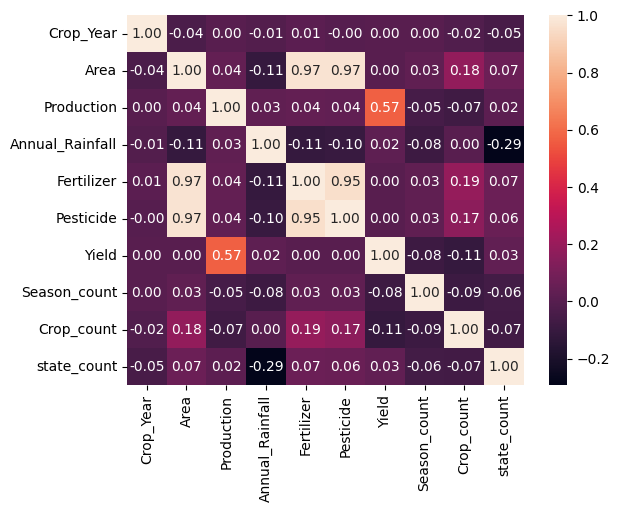

In [8]:
import seaborn as sns

corr = data.corr()
sns.heatmap(corr, annot=True, fmt=".2f")

In [9]:
X = data.drop(columns=['Yield'])
y = data['Yield']

In [10]:
import statsmodels.api as sm
import numpy as np
model = sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Yield   R-squared (uncentered):                   0.339
Model:                            OLS   Adj. R-squared (uncentered):              0.339
Method:                 Least Squares   F-statistic:                              1122.
Date:                Wed, 20 Dec 2023   Prob (F-statistic):                        0.00
Time:                        06:51:09   Log-Likelihood:                     -1.5739e+05
No. Observations:               19689   AIC:                                  3.148e+05
Df Residuals:                   19680   BIC:                                  3.149e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Crop_Year           0.1219      0.014      8.839      0.000       0.095       0.149
Area            -1.003e-05   3.98e-05     -0.252      0.801    -8.8e-05     6.8e-05
Production       1.878e-06   1.96e-08     95.993      0.000    1.84e-06    1.92e-06
Annual_Rainfall     0.0036      0.007      0.549      0.583      -0.009       0.017
Fertilizer       1.006e-08   2.37e-07      0.042      0.966   -4.55e-07    4.75e-07
Pesticide        6.701e-06      0.000      0.063      0.950      -0.000       0.000
Season_count       -0.0200      0.002     -9.247      0.000      -0.024      -0.016
Crop_count         -0.2282      0.020    -11.677      0.000      -0.267      -0.190
state_count         0.0454      0.018      2.532      0.011       0.010       0.081
==============================================================================
Omnibus:                    36428.695   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         48043379.792
Skew:                          14.094   Prob(JB):                         0.00
Kurtosis:                     243.350   Cond. No.                     1.17e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.17e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
X = data.drop(columns=['Yield', 'Area', 'Fertilizer', 'Pesticide', 'Production'])
y = data['Yield']

In [12]:
import statsmodels.api as sm
import numpy as np
model = sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Yield   R-squared (uncentered):                   0.029
Model:                            OLS   Adj. R-squared (uncentered):              0.029
Method:                 Least Squares   F-statistic:                              117.0
Date:                Wed, 20 Dec 2023   Prob (F-statistic):                   2.33e-122
Time:                        06:51:09   Log-Likelihood:                     -1.6118e+05
No. Observations:               19689   AIC:                                  3.224e+05
Df Residuals:                   19684   BIC:                                  3.224e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Crop_Year           0.1867      0.017     11.197      0.000       0.154       0.219
Annual_Rainfall     0.0221      0.008      2.768      0.006       0.006       0.038
Season_count       -0.0320      0.003    -12.260      0.000      -0.037      -0.027
Crop_count         -0.3748      0.023    -16.218      0.000      -0.420      -0.330
state_count         0.0701      0.022      3.229      0.001       0.028       0.113
==============================================================================
Omnibus:                    34115.104   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         24479451.972
Skew:                          12.472   Prob(JB):                         0.00
Kurtosis:                     173.930   Cond. No.                         30.1
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X = scaler.fit_transform(X)

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.33)

In [15]:
X_train

,Crop_Year,Annual_Rainfall,Season_count,Crop_count,state_count
16277,2018,1102.2,3717,685,845
7021,1999,883.4,1195,1197,825
13475,2013,2043.5,3717,605,441
14356,2015,1223.2,8232,349,616
19235,1998,1357.1,1195,1197,760
...,...,...,...,...,...
11284,2009,585.8,1195,1197,825
11964,2010,1096.0,5742,975,1094
5390,2017,970.9,5742,454,822
860,2001,1002.9,8232,300,1432


In [16]:
from sklearn.metrics import mean_squared_error

In [17]:
from sklearn.ensemble import ExtraTreesRegressor

etr = ExtraTreesRegressor(n_estimators=100, random_state=0)
etr.fit(X_train, y_train)

rms_etr = mean_squared_error(y_test, etr.predict(X_test), squared=False)
rms_etr


231.70880754240153

In [18]:
import pickle

# Save the model
with open('model.pkl', 'wb') as file:
    pickle.dump(etr, file)

In [32]:
y_test

18238     3.820000
6918      1.395357
4894      6.522727
10960     0.812857
15615     0.508000
           ...    
1345      1.720000
63        0.806667
17097     3.930909
14582    70.393333
16004     0.582632
Name: Yield, Length: 6498, dtype: float64

In [33]:
etr.predict(X_test)

array([ 3.02291397,  1.40869985,  6.64310909, ...,  3.72767528,
       43.60199754,  0.70710765])

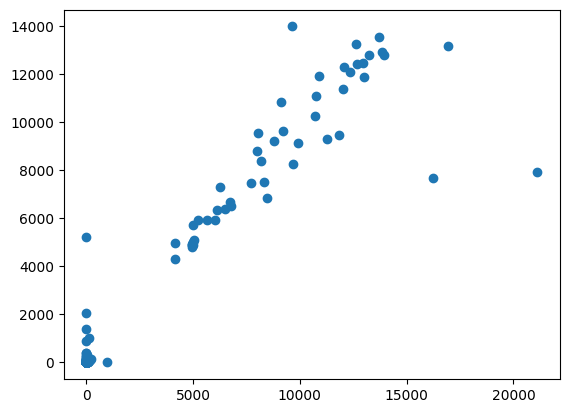

In [34]:
import matplotlib.pyplot as plt

plt.scatter(y_test, etr.predict(X_test))

### Neural network approach

In [35]:
X_test[0]

array([ 1.05763096, -0.654869  ,  0.96898961, -0.54029394, -0.52269826])

# Convert this text answer to speech with pyttsx3 or similar

In [54]:
# answers_model = [Crop_Year,
#             Annual_Rainfall,
#             Season_count,	
#             Crop_count,	
#             state_count]

# farmer_input = []


# normalized_input = scaler.fit_transform(np.array(farmer_input).reshape(-1,1))
normalized_input = np.array([[1.05763096, -0.654869  ,  0.96898961, -0.54029394, -0.52269826]])
normalized_input

array([[ 1.05763096, -0.654869  ,  0.96898961, -0.54029394, -0.52269826]])

In [63]:
import pyttsx3

def audio_response(normalized_input, language='en'):
    engine = pyttsx3.init()

    if language == 'en':
        engine.say(f"The predicted yield of the crop for given conditions is: {etr.predict(normalized_input)}")
    elif language == 'fr':
        engine.setProperty('voice', 'fr')
        engine.say(f"La production prévue de la culture pour les conditions données est : {etr.predict(normalized_input)}")
    elif language == 'kn':
        engine.setProperty('voice', 'kn')
        engine.say(f"ನೀಡಿದ ಸ್ಥಿತಿಗಾಗಿ ಹೊರಗಿನ ಪೈಲಾನೆನ್ನು ಅನುಮಾನಿಸಲಾಗಿದೆ: {etr.predict(normalized_input)}")
    else:
        engine.say(f"The predicted yield of the crop for given conditions is: {etr.predict(normalized_input)}")

    engine.runAndWait()
    engine.stop()

audio_response(normalized_input, language='en')

audio_response(normalized_input, language='fr')

audio_response(normalized_input, language='kn')
